### Assignment 3(Created by Diksha Singla on 21-06-2019)

#### 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation

Using TensorFlow backend.


#### 2. Reading data

In [2]:
data_x=pd.read_pickle('trainX.pickle')
data_y=pd.read_pickle('trainY.pickle')
print(np.unique(data_y)) #to find classes of the data y 
print(data_x.shape,data_y.shape)

[0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28) (60000,)


#### 3. Dividing data into train, test and valid

In [3]:
img_rows,img_cols=28,28
x_train=data_x[:40000]
x_valid=data_x[40000:50000]
x_test=data_x[50000:60000]
y_train=data_y[:40000]
y_valid=data_y[40000:50000]
y_test=data_y[50000:]

#### 4.Changing Shape in Keras

In [4]:
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_valid=x_valid.reshape(x_valid.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
input_shape=(img_rows,img_rows,1)
input_shape

(28, 28, 1)

#### 5.Specifying batch size categorical classes and epochs 

In [5]:
batch_size=128
num_classes=10
epochs=100

#### 6. Changing shape of data and converting class vectors to binary class matrices

In [6]:
x_train=x_train.astype('float32')
x_valid=x_valid.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
x_valid/=255
print('x_train shape',x_train.shape)
print('x_test shape',x_test.shape)
print('x_valid shape',x_valid.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')
print(x_valid.shape[0],'test samples')

y_train=keras.utils.to_categorical(y_train,num_classes)
y_valid=keras.utils.to_categorical(y_valid,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

x_train shape (40000, 28, 28, 1)
x_test shape (10000, 28, 28, 1)
x_valid shape (10000, 28, 28, 1)
40000 train samples
10000 test samples
10000 test samples


#### 7.Reshaping the data_x

In [7]:
x_train=np.reshape(x_train,(40000,784))
x_valid=np.reshape(x_valid,(10000,784))
x_test=np.reshape(x_test,(10000,784))

In [8]:
print('x_train shape',x_train.shape)
print('x_valid shape',x_valid.shape)
print('x_test shape',x_test.shape)
print(x_train.shape[0],'train samples')
print(x_valid.shape[0],'valid samples')
print(x_test.shape[0],'test samples')

x_train shape (40000, 784)
x_valid shape (10000, 784)
x_test shape (10000, 784)
40000 train samples
10000 valid samples
10000 test samples


### 8. Models

#### 8.1  Applying Sequential Model(Categorical cross entropy)

In [10]:
model=Sequential()
model.add(Dense(500,input_dim=784),)
model.add(Activation('relu'))

model.add(Dense(300))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_4 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               150300    
_________________________________________________________________
activation_5 (Activation)    (None, 300)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                3010      
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 0
_________________________________________________________________


#### 8.2 Fitting the validate data

In [11]:
model.fit(x_train,y_train,batch_size=batch_size,epochs=100,verbose=1,validation_data=(x_valid,y_valid))

W0623 10:34:11.407591  5328 deprecation.py:323] From c:\users\diksha\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0623 10:34:11.602718  5328 deprecation_wrapper.py:119] From c:\users\diksha\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 14s 343us/step - loss: 0.6136 - acc: 0.7794 - val_loss: 0.4817 - val_acc: 0.8301
Epoch 2/100
40000/40000 [==============================] - 11s 285us/step - loss: 0.4131 - acc: 0.8482 - val_loss: 0.5066 - val_acc: 0.8025
Epoch 3/100
40000/40000 [==============================] - 11s 274us/step - loss: 0.3649 - acc: 0.8634 - val_loss: 0.3455 - val_acc: 0.8757
Epoch 4/100
40000/40000 [==============================] - 11s 272us/step - loss: 0.3366 - acc: 0.8740 - val_loss: 0.3784 - val_acc: 0.8690
Epoch 5/100
40000/40000 [==============================] - 11s 271us/step - loss: 0.3106 - acc: 0.8837 - val_loss: 0.3458 - val_acc: 0.8708
Epoch 6/100
40000/40000 [==============================] - 11s 272us/step - loss: 0.2906 - acc: 0.8904 - val_loss: 0.4010 - val_acc: 0.8540
Epoch 7/100
40000/40000 [==============================] - 11s 274us/step - loss: 0.2763 - acc: 0.8967 - val_l

40000/40000 [==============================] - 11s 268us/step - loss: 0.0387 - acc: 0.9862 - val_loss: 0.5579 - val_acc: 0.8976 1s - l
Epoch 59/100
40000/40000 [==============================] - 11s 280us/step - loss: 0.0343 - acc: 0.9875 - val_loss: 0.5816 - val_acc: 0.9049
Epoch 60/100
40000/40000 [==============================] - 12s 292us/step - loss: 0.0364 - acc: 0.9864 - val_loss: 0.5351 - val_acc: 0.9016
Epoch 61/100
40000/40000 [==============================] - 12s 293us/step - loss: 0.0319 - acc: 0.9881 - val_loss: 0.6348 - val_acc: 0.8905
Epoch 62/100
40000/40000 [==============================] - 12s 288us/step - loss: 0.0344 - acc: 0.9878 - val_loss: 0.6462 - val_acc: 0.8976
Epoch 63/100
40000/40000 [==============================] - 12s 298us/step - loss: 0.0321 - acc: 0.9889 - val_loss: 0.6526 - val_acc: 0.8866
Epoch 64/100
40000/40000 [==============================] - 12s 301us/step - loss: 0.0280 - acc: 0.9899 - val_loss: 0.5993 - val_acc: 0.8983
Epoch 65/100
40000/

#### 8.3 Evaluating the model on test data

In [12]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss: ',score[0])
print('Test accuracy: ',score[1])

Test loss:  0.7381533797152341
Test accuracy:  0.8985


#### 9. predicting Values

In [13]:
predictions=model.predict_classes([x_test])
print(predictions)

[9 2 1 ... 3 0 5]


In [14]:
count=0
for i in range(0,len(predictions),1):
    if (np.argmax(y_test[i])==predictions[i]):
        count+=1
count/len(y_test)

0.8985

In [ ]:
"""model.save('assign3.model')
new_model=tf.keras.models.load_model('assign3.model')
predictions=new_model.predict([x_test])
for i in range(0,len(predictions),1):
    print(np.argmax(predictions[i]))
    
import pickle
pickle_out=open('y_test.pickle','w')
pickle.dump(y_test,pickle_out)
pickle_out.close()
"""

### CNN MODEL

#### 1. Reading data from X train and y train files

In [15]:
data_x=pd.read_pickle('trainX.pickle')
data_y=pd.read_pickle('trainY.pickle')
print(np.unique(data_y)) #to find classes of the data y 
print(data_x.shape,data_y.shape)

[0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28) (60000,)


#### 2. Separating data into test train and valid data and reshaping the data

In [16]:
img_rows,img_cols=28,28
x_train=data_x[:40000]
x_valid=data_x[40000:50000]
x_test=data_x[50000:60000]
y_train=data_y[:40000]
y_valid=data_y[40000:50000]
y_test=data_y[50000:]
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_valid=x_valid.reshape(x_valid.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
input_shape=(img_rows,img_rows,1)
input_shape

(28, 28, 1)

#### 3. Reshaping data into categorical data

In [17]:
batch_size=128
num_classes=10
epochs=100
x_train=x_train.astype('float32')
x_valid=x_valid.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
x_valid/=255
print('x_train shape',x_train.shape)
print('x_test shape',x_test.shape)
print('x_valid shape',x_valid.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')
print(x_valid.shape[0],'test samples')

y_train=keras.utils.to_categorical(y_train,num_classes)
y_valid=keras.utils.to_categorical(y_valid,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

x_train shape (40000, 28, 28, 1)
x_test shape (10000, 28, 28, 1)
x_valid shape (10000, 28, 28, 1)
40000 train samples
10000 test samples
10000 test samples


#### 4. Building the CNN model by adding layers

In [19]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)         73856     
__________

#### 5. Fitting and Evaluating the model with train valid and test data and checking its accuracy

In [20]:
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=50,verbose=1,validation_data=(x_valid, y_valid))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ',score[0])
print('Test accuracy: ',score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 75s 2ms/step - loss: 0.8133 - acc: 0.6961 - val_loss: 0.5034 - val_acc: 0.8155
Epoch 2/50
40000/40000 [==============================] - 73s 2ms/step - loss: 0.5134 - acc: 0.8095 - val_loss: 0.4283 - val_acc: 0.8452
Epoch 3/50
40000/40000 [==============================] - 72s 2ms/step - loss: 0.4391 - acc: 0.8397 - val_loss: 0.3543 - val_acc: 0.8749
Epoch 4/50
40000/40000 [==============================] - 71s 2ms/step - loss: 0.3954 - acc: 0.8540 - val_loss: 0.3286 - val_acc: 0.8836
Epoch 5/50
40000/40000 [==============================] - 70s 2ms/step - loss: 0.3647 - acc: 0.8659 - val_loss: 0.3090 - val_acc: 0.8886
Epoch 6/50
40000/40000 [==============================] - 70s 2ms/step - loss: 0.3393 - acc: 0.8762 - val_loss: 0.2938 - val_acc: 0.8932
Epoch 7/50
40000/40000 [==============================] - 70s 2ms/step - loss: 0.3264 - acc: 0.8794 - val_loss: 0.2952 - val_acc

#### 6. Plotting Graphs to visualise the training and validation accuracy and loss

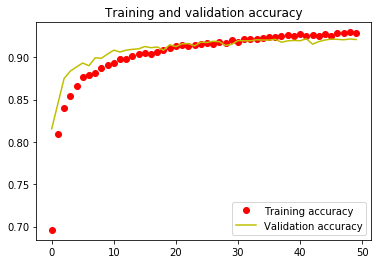

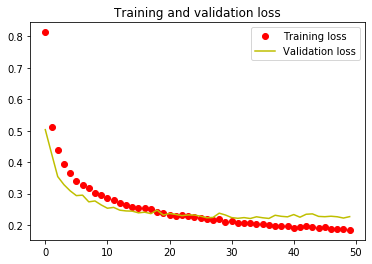

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'y', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### 7. Prediction of data for x_test

In [22]:
predictions=model.predict_classes([x_test])
print(predictions)

[9 2 1 ... 3 0 5]


#### 8. Reading the given test data and performing reshape operations

In [24]:
test_x=pd.read_pickle('testX.pickle')
print(test_x.shape)
test_x=test_x.reshape(test_x.shape[0],img_rows,img_cols,1)
test_x=test_x.astype('float32')
test_x/=255
print('test_x shape',test_x.shape)
print(test_x.shape[0],'test samples')

(10000, 28, 28)
test_x shape (10000, 28, 28, 1)
10000 test samples


#### 9. Predicting the classes for test data using the CNN MODEL

In [26]:
test_y=model.predict_classes([test_x])
print(test_y)

[9 2 1 ... 8 1 5]


#### 10. Writing data into pickle file

In [29]:
import pickle
pickle_out=open('DikshaSingla_testY.pickle','wb')
pickle.dump(test_y,pickle_out)
pickle_out.close()